In [1]:
# import
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
# load data
data = io.loadmat('./data/hw1_prob2.mat')

A = data['A']
w = data['w']
x = data['x']
y = data['y']
y_orig = data['y_orig']

M, N = A.shape

In [3]:
# y_hat = Ax + w
# y_hat = A x_hat

In [4]:
# inverse
x_hat = la.inv(A)@y

In [5]:
# pseudo-inverse (least-square)
x_hat = la.inv(A.T@A)@A.T@y

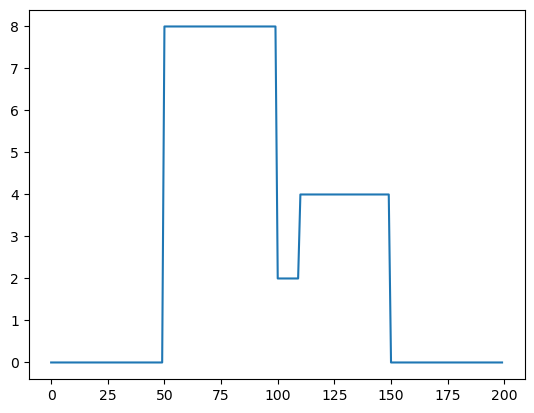

In [6]:
plt.plot(x)

In [7]:
# svd
[U, S, Vh] = la.svd(A, full_matrices=False)

S = np.diag(S)
V = Vh.T

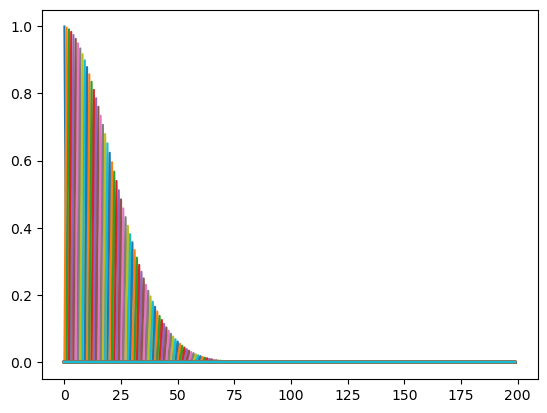

In [8]:
# plot svd
plt.plot(S)
plt.show()

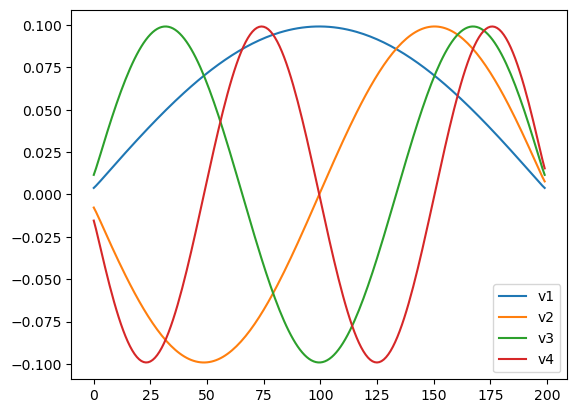

In [9]:
plt.plot(V[:,0], label='v1')
plt.plot(V[:,1], label='v2')
plt.plot(V[:,2], label='v3')
plt.plot(V[:,3], label='v4')
plt.legend()
plt.show()

In [10]:
# svd (low rank approximation), r
J_list = np.empty(50)

for r in range(50):
    x_hat = V[:,:r] @ la.inv(S[:r,:r]) @ U[:,:r].T @ y
    J_list[r] = la.norm(x_hat - x)

idx = np.argmin(J_list)
r = idx
x_hat = V[:,:r] @ la.inv(S[:r,:r]) @ U[:,:r].T @ y

print('r =', r)

r = 28


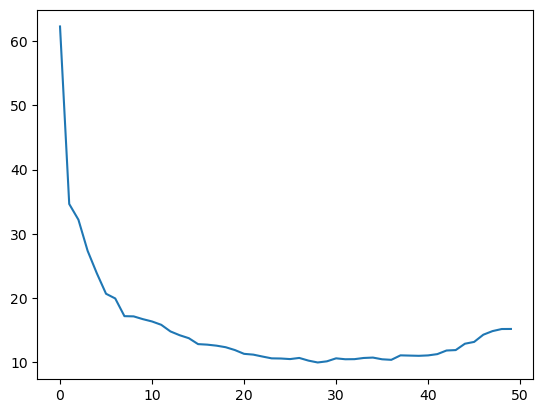

In [11]:
plt.plot(J_list)
plt.show()

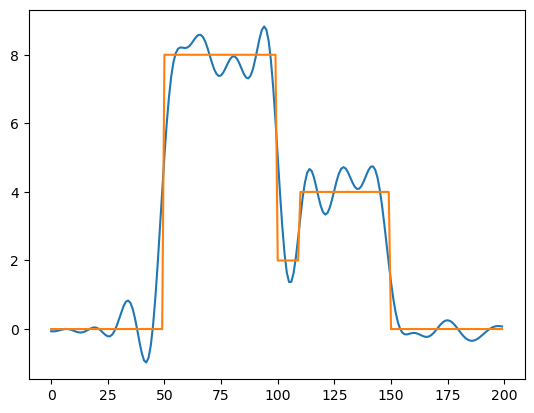

In [12]:
plt.plot(x_hat)
plt.plot(x)
plt.show()

In [13]:
# Tychonov regularization, mu
ITER = 1000
I = np.eye(N)

J_list = np.empty(ITER)
mu_list = np.linspace(0.001, 0.1, ITER)

for i, mu in enumerate(mu_list):
    x_hat = la.inv(A.T @ A + mu*I) @ A.T @ y
    J_list[i] = la.norm(x_hat - x)

idx = np.argmin(J_list)
mu = mu_list[idx]
x_hat = la.inv(A.T @ A + mu*I) @ A.T @ y

print('mu =', mu)

mu = 0.05173873873873874


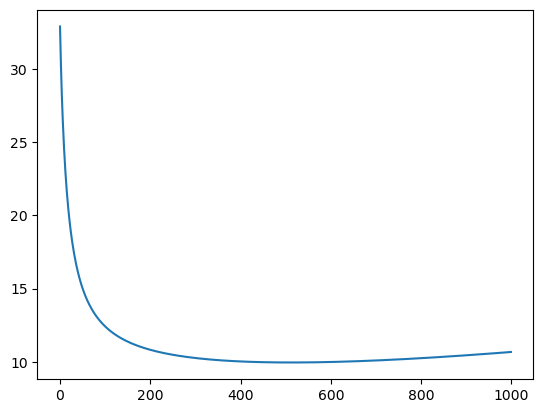

In [14]:
plt.plot(J_list)
plt.show()

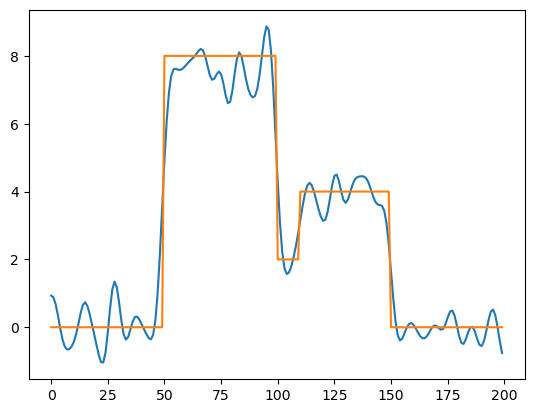

In [15]:
plt.plot(x_hat)
plt.plot(x)
plt.show()